In [ ]:
#import thư viện
import numpy as np 
from keras.utils import np_utils 
from keras.datasets import cifar10 
from keras.models import Sequential 
from keras.layers import Dense, Dropout 
from tensorflow.keras.optimizers import RMSprop 
import matplotlib.pyplot as plt  
from keras.backend import dropout
from keras.callbacks import EarlyStopping


170508288/170498071 [==============================] - 3s 0us/step


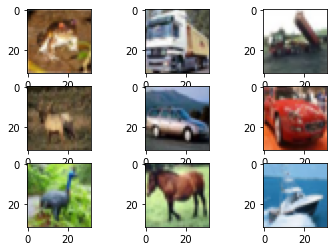

In [ ]:
import matplotlib.pyplot as plt 
(x_train, y_train),(x_test,y_test) = cifar10.load_data()
for i in range (9):
  plt.subplot(330+i+1) 
  plt.imshow(x_train[i],cmap=plt.get_cmap('nipy_spectral'))
plt.show()


In [ ]:
x_train=x_train.reshape(50000,3072)
x_test=x_test.reshape(10000,3072)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)


In [ ]:
model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(3072,)))
model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#translate model
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])


In [ ]:
#chạy model với số lần học là 500 và độ kiên nhẫn là 100
history=model.fit(x_train,y_train,batch_size=128,epochs=500,verbose=1,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=100)])


Epoch 1/500
313/313 [==============================] - 5s 6ms/step - loss: 2.1926 - accuracy: 0.2452 - val_loss: 1.9081 - val_accuracy: 0.3087
Epoch 2/500
313/313 [==============================] - 1s 5ms/step - loss: 1.8420 - accuracy: 0.3381 - val_loss: 1.7905 - val_accuracy: 0.3599
Epoch 3/500
313/313 [==============================] - 1s 5ms/step - loss: 1.7617 - accuracy: 0.3675 - val_loss: 1.7405 - val_accuracy: 0.3769
Epoch 4/500
313/313 [==============================] - 1s 5ms/step - loss: 1.7097 - accuracy: 0.3889 - val_loss: 1.6503 - val_accuracy: 0.4181
Epoch 5/500
313/313 [==============================] - 1s 5ms/step - loss: 1.6619 - accuracy: 0.4065 - val_loss: 1.6826 - val_accuracy: 0.3969
Epoch 6/500
313/313 [==============================] - 2s 5ms/step - loss: 1.6261 - accuracy: 0.4178 - val_loss: 1.6216 - val_accuracy: 0.4142
Epoch 7/500
313/313 [==============================] - 1s 5ms/step - loss: 1.5964 - accuracy: 0.4277 - val_loss: 1.6486 - val_accuracy: 0.4169

In [ ]:
# Danh gia do chinh xac
score=model.evaluate(x_test,y_test,verbose=0)
print('Test_loss',score[0])
print('Test accuracy',score[1])


Test_loss 1.8370146751403809
Test accuracy 0.45910000801086426


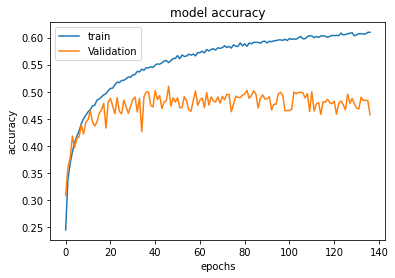

In [ ]:
#Ve do thi
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()
